In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class NetA(nn.Module):
    def __init__(self):
        super(NetA, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.fc1(x)
        return x

class NetB(nn.Module):
    def __init__(self):
        super(NetB, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 300)
        self.fc2 = nn.Linear(300, 10)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class NetC(nn.Module):
    def __init__(self):
        super(NetC, self).__init__()
        self.conv1 = nn.Conv2d(3,25,5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(14 * 14 * 25, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 14 * 14 * 25)
        x = self.fc1(x)
        x = self.fc2(x)
        return x


In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()

In [ ]:
def train(net, train_loader, testloader, num_epochs, learning_rate):
  optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
  train_accuracy=[]
  test_accuracy=[]
  for epoch in range(num_epochs):  # loop over the dataset multiple times
    print(f'Epoch {epoch+1} => ' )
    running_loss = 0.0
    total=0
    correct=0
    net.train()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy=100.*correct/total
    print(f'training accuracy : {accuracy}')
    train_accuracy.append(accuracy)

    net.eval()
    running_loss=0
    correct=0
    total=0
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    accuracy=100.*correct/total
    print(f'testing accuracy : {accuracy}\n')
    test_accuracy.append(accuracy)
  return train_accuracy,test_accuracy


In [ ]:
import matplotlib.pyplot as plt
def plot_history(histories):
  for i in histories:
    plt.plot([i for i in range(0,50)],i['train_accs'],label=i['name'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    print(f"\nFinal Training Accuracy of {i['name']} : {i['train_accs'][-1]}\n")
  plt.legend()
  plt.title('Training Accuracies')
  plt.show()
  for i in histories:
    plt.plot([i for i in range(0,50)],i['test_accs'],label=i['name'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    print(f"\nFinal Testing Accuracy of {i['name']} : {i['test_accs'][-1]}\n")
  plt.legend()
  plt.title('Testing Accuracies')
  plt.show()

In [ ]:
nets = [NetA(), NetB(), NetC()]
histories = []
for net in nets:
  net_name = type(net).__name__
  print(f'==== Training {net_name} ====')
  train_history, test_history = train(net, trainloader, testloader, 50, 0.001)
  histories.append({'name': net_name,'net': net,'train_accs': train_history,'test_accs': test_history})

==== Training NetA ====
Epoch 1 => 
training accuracy : 36.904
testing accuracy : 39.2

Epoch 2 => 
training accuracy : 40.04
testing accuracy : 39.59

Epoch 3 => 
training accuracy : 41.004
testing accuracy : 40.39

Epoch 4 => 
training accuracy : 41.554
testing accuracy : 39.65

Epoch 5 => 
training accuracy : 41.942
testing accuracy : 39.29

Epoch 6 => 
training accuracy : 42.19
testing accuracy : 39.69

Epoch 7 => 
training accuracy : 42.326
testing accuracy : 40.39

Epoch 8 => 
training accuracy : 42.544
testing accuracy : 39.63

Epoch 9 => 
training accuracy : 42.734
testing accuracy : 40.28

Epoch 10 => 
training accuracy : 43.08
testing accuracy : 39.84

Epoch 11 => 
training accuracy : 43.024
testing accuracy : 39.82

Epoch 12 => 
training accuracy : 43.186
testing accuracy : 40.1

Epoch 13 => 
training accuracy : 43.464
testing accuracy : 39.04

Epoch 14 => 
training accuracy : 43.308
testing accuracy : 40.08

Epoch 15 => 
training accuracy : 43.528
testing accuracy : 39.78




Final Training Accuracy of NetA : 44.882


Final Training Accuracy of NetB : 89.79


Final Training Accuracy of NetC : 79.894



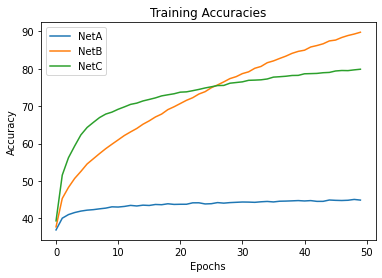


Final Testing Accuracy of NetA : 39.76


Final Testing Accuracy of NetB : 52.41


Final Testing Accuracy of NetC : 62.77



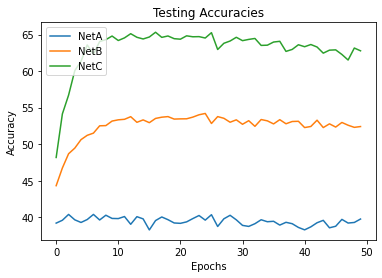

In [ ]:
plot_history(histories)